# WayNet - Road Segmentation Task Project

### Dependencies

In [1]:
import torch
torch.device("mps")

device(type='mps')

In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
import torch
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torch import nn
import albumentations as alb
from PIL import Image
from torchvision import transforms

### Loading the Data

In [11]:
df= load_dataset("bnsapa/road-detection")
df_train = df["train"]
df_train

Dataset({
    features: ['image', 'segment', 'lane'],
    num_rows: 160
})

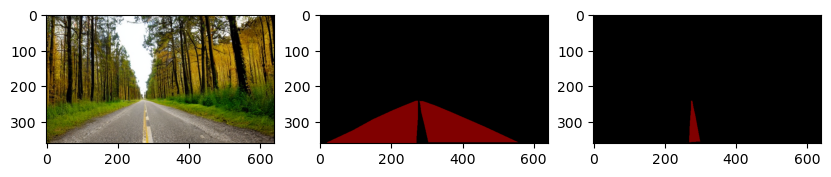

In [34]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(df_train["image"][0])
plt.subplot(1,3,2)
plt.imshow(df_train["segment"][0])
plt.subplot(1,3,3)
plt.imshow(df_train["lane"][0])
plt.show()

### Building the Data Loader

In [36]:
class RoadSegmentationDF():
    
    def __init__(self,data,transform = None):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self,idx):
        image = Image.open(self.data["image"][idx]).convert("RGB")
        mask = Image.open(self.data["segment"][idx]).convert("L")

        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)
        
        return image,mask

In [38]:
transform = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.ToTensor()
])